<p align="center">
  <img width="1000" src="https://user-images.githubusercontent.com/54799451/70923023-73647c00-2027-11ea-8ad6-599aa8750c50.png">
</p>


# Maps in Scientific Python

_Unleashing Cartopy Capabilities_

Making maps is a fundamental part in Environmental Science.

Maps differ from regular figures in the following principle ways:

- Maps require a *projection* of geographic coordinates on the 3D Earth to the 2D space of your figure.
- Maps often include extra decorations besides just our data (*e.g.* continents, country borders, etc.)

Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In this notebook, we will learn about [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), one of the most common packages for making maps within Python. 


> Another popular and powerful library is [Basemap](https://matplotlib.org/basemap/); however, Basemap is [going away](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement) and being replaced with Cartopy in the near future. For this reason, new python learners are recommended to learn Cartopy.

# Introducing Cartopy

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) makes use of the powerful [PROJ.4](https://proj4.org/), numpy and shapely libraries and includes a programatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

## Cartopy Projections and other reference systems

In Cartopy, each projection is a class.

Most classes of projection can be configured in projection-specific ways, although Cartopy takes an opinionated stance on sensible defaults.

Let's create a **Plate Carree projection** instance.

To do so, we need cartopy's crs module. This is typically imported as ``ccrs`` (Cartopy Coordinate Reference Systems).

In [3]:
import os
import cartopy
import cartopy.crs as ccrs
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

Cartopy's projection list tells us that the Plate Carree projection is available with the ``ccrs.PlateCarree`` class:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html


We need to *instantiate* the class in order to do anything projection-y with it!

In [4]:
ccrs.PlateCarree()

## Drawing a map

Cartopy optionally depends upon matplotlib, and each projection knows how to create a matplotlib Axes (or AxesSubplot) that can represent itself.

The Axes that the projection creates is a [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes). This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.

We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

<GeoAxesSubplot:>

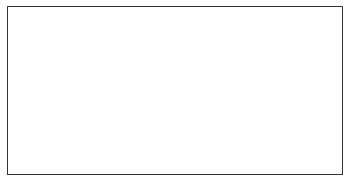

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

That was a little underwhelming, but we can see that the Axes created is indeed one of those GeoAxes[Subplot] instances.

One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the ``coastlines`` method. With no arguments, it will add the Natural Earth ``1:110,000,000`` scale coastline data to the map.

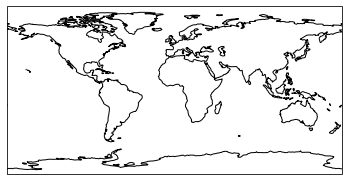

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the ```plt.subplots``` function could be used:

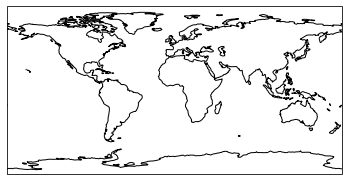

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

Projection classes have options we can use to customize the map

In [8]:
ccrs.PlateCarree?

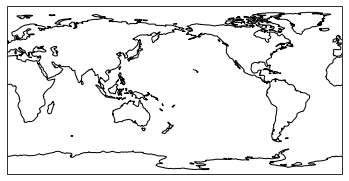

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

# Useful methods of a GeoAxes

The [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes) class adds a number of useful methods.

Let's take a look at:

 * [set_global](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) - zoom the map out as much as possible
 * [set_extent](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent) - zoom the map to the given bounding box
 

 * [gridlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.graticule) - add a graticule (and optionally labels) to the axes
 * [coastlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) - add Natural Earth coastlines to the axes
 * [stock_img](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) - add a low-resolution Natural Earth background image to the axes
 
 
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) - add an image (numpy array) to the axes
 * [add_geometries](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries) - add a collection of geometries (Shapely) to the axes


## Some More Examples of Different Global Projections

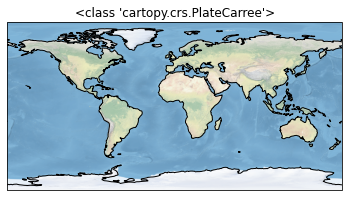

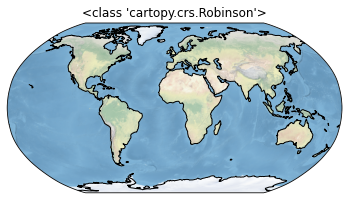

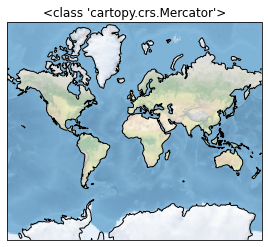

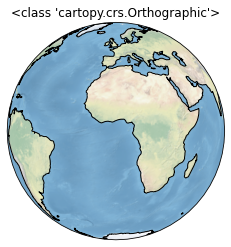

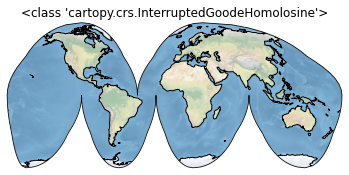

In [20]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

## Regional Maps

To create a regional map, we use the `set_extent` method of GeoAxis to limit the size of the region.

In [21]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/anaconda3/envs/envireef/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py
Type:      method


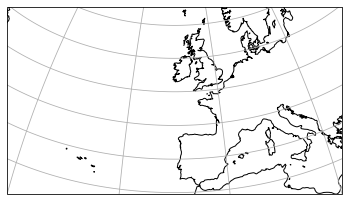

In [22]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')


# Adding Features to the Map

To give our map more styles and details, we add `cartopy.feature` objects.
Many useful features are built in. These "default features" are at coarse (110m) resolution.

Name | Description
-----|------------
`cartopy.feature.BORDERS` | Country boundaries
`cartopy.feature.COASTLINE` | Coastline, including major islands
`cartopy.feature.LAKES` | Natural and artificial lakes
`cartopy.feature.LAND` | Land polygons, including major islands
`cartopy.feature.OCEAN` | Ocean polygons
`cartopy.feature.RIVERS` | Single-line drainages, including lake centerlines
`cartopy.feature.STATES` | (limited to the United States at this scale)

Below we illustrate these features in a customized map of North America.

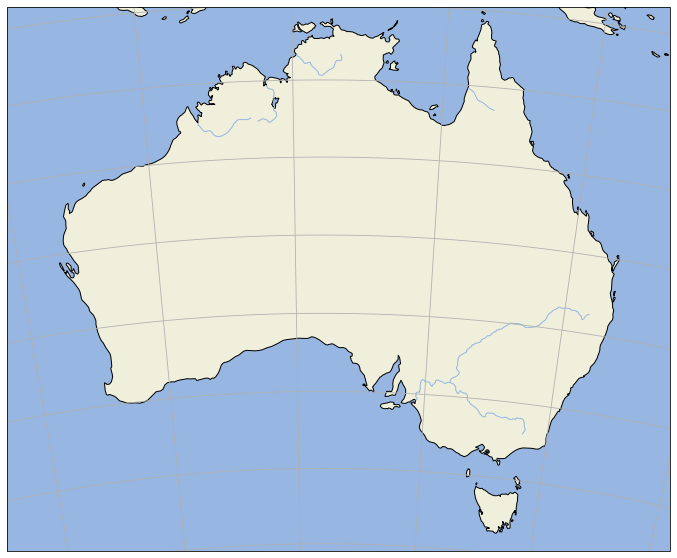

In [35]:
import cartopy.feature as cfeature
import numpy as np

central_lat = -23.
central_lon = 132.
extent = [112, 154, -44, -9]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

albo = ccrs.AlbersEqualArea(central_latitude=0,
 false_easting=0, 
 false_northing=0, 
 central_longitude=132, 
 standard_parallels=(-18, -36) )

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=albo)
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

If we want higher-resolution features, Cartopy can automatically download and create them from the [Natural Earth Data](http://www.naturalearthdata.com/) database or the [GSHHS dataset](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) database.

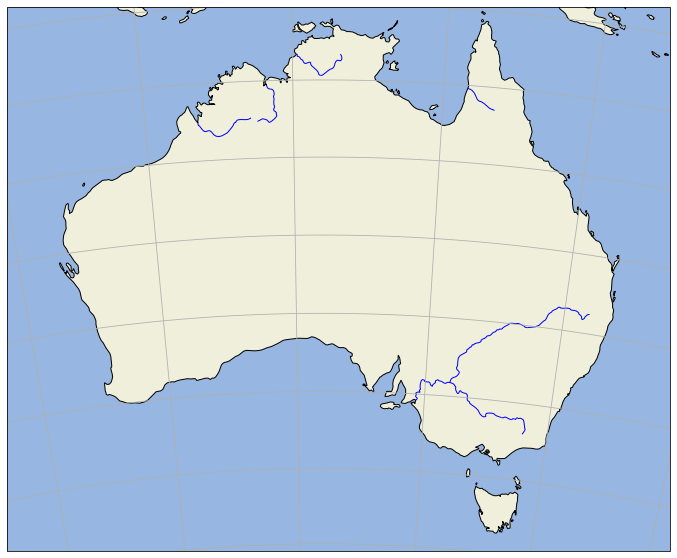

In [36]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=albo)
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

# Adding Data to the Map

Now that we know how to create a map, let's add our data to it! That's the whole point.

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots.
By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

In [37]:
# create some test data
sydney = dict(lon=151.2093, lat=-33.8688)
perth = dict(lon=115.8613, lat=-31.9523)

lons = [sydney['lon'], perth['lon']]
lats = [sydney['lat'], perth['lat']]

Key point: **the data also have to be transformed to the projection space**.
This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object.
If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

From the [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html)

> The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

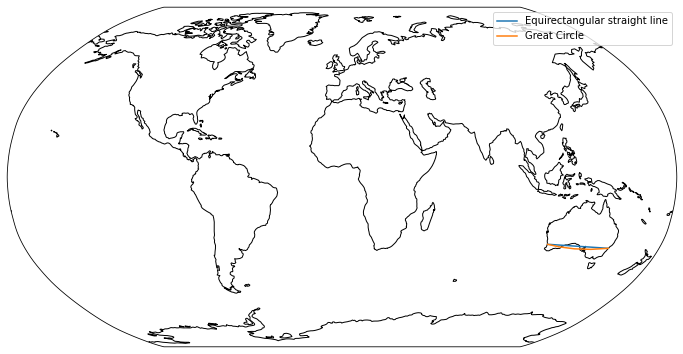

In [48]:
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Robinson())

ax.plot(lons, lats, label='Equirectangular straight line', transform=ccrs.PlateCarree())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())

ax.coastlines()
ax.legend()
ax.set_global()

# Plotting 2D (Raster) Data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

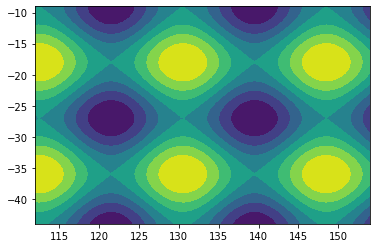

In [56]:
import numpy as np
lon = np.linspace(112, 154, 100)
lat = np.linspace(-44, -9, 100)


lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 20) + np.sin(np.deg2rad(lon2d) * 20)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any `transform` keyword.
This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

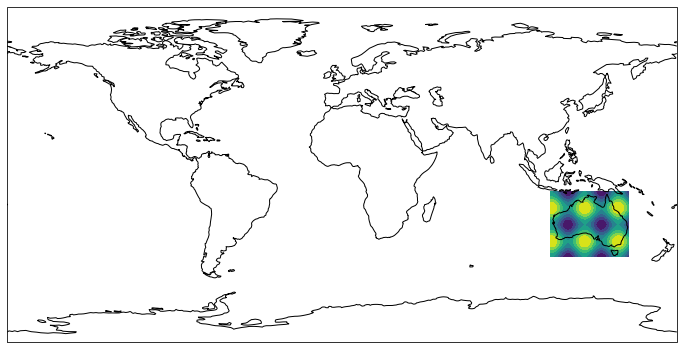

In [62]:
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, we get the wrong result.

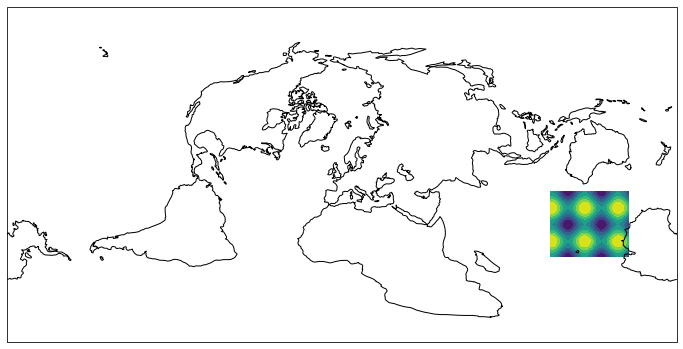

In [63]:
plt.figure(figsize=(12, 10))
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to `contourf`:

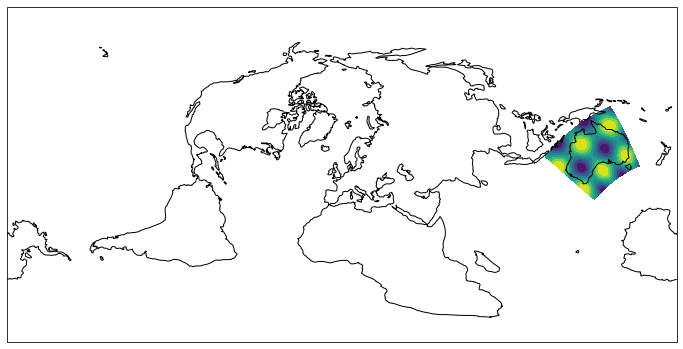

In [64]:
plt.figure(figsize=(12, 10))
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

# Showing Images

We can plot a satellite image easily on a map if we know its extent

Text(-117, 33, 'San Diego')

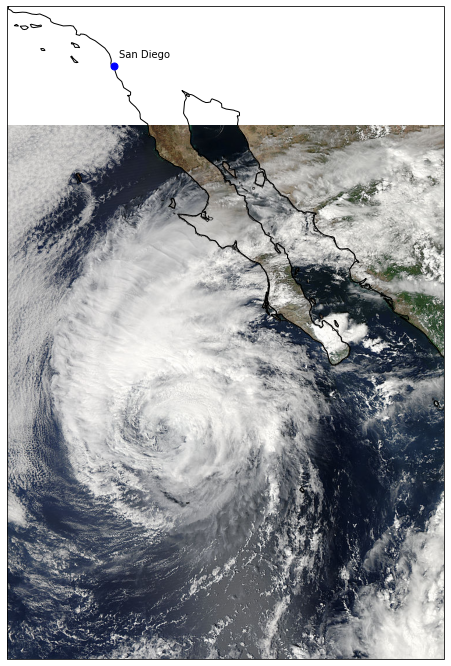

In [66]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)

img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())


# Doing More

Browse the [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) to learn about all the different types of data and plotting methods available!